# Import libraries

In [100]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

# Read Dataset

In [101]:
df= pd.read_csv(r"C:\Users\sad57\Desktop\The journey\Data_Sets\EDA\dataset_olympics.csv")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Overview on data

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


In [103]:
df.describe()

,ID,Age,Height,Weight,Year
count,70000.000000,67268.000000,53746.000000,52899.000000,70000.000000
mean,18081.846986,25.644645,175.505303,70.900216,1977.766457
std,10235.613253,6.485239,10.384203,14.217489,30.103306
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,9325.750000,21.000000,168.000000,61.000000,1960.000000
50%,18032.000000,25.000000,175.000000,70.000000,1984.000000
75%,26978.000000,28.000000,183.000000,79.000000,2002.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


In [104]:
df.shape

(70000, 15)

In [105]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

# Data Preprocessing and cleaning 

In [106]:
df.duplicated().sum()

np.int64(383)

In [107]:
df.drop_duplicates(inplace=True)

In [108]:
df.duplicated().sum()

np.int64(0)

In [109]:
df.isnull().sum()

ID            0
Name          0
Sex           0
Age        2671
Height    15876
Weight    16718
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     59931
dtype: int64

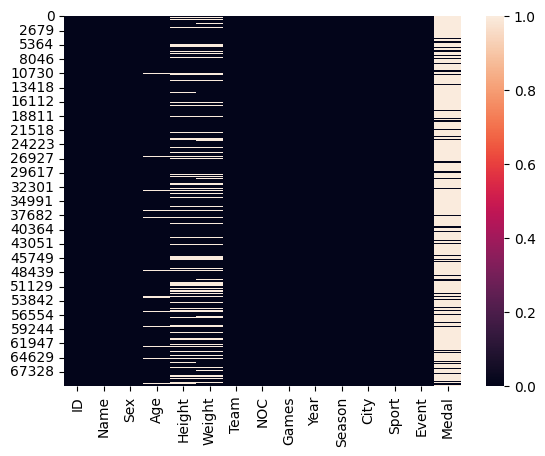

In [110]:
sns.heatmap(df.isna())
plt.show()

# Step 1 – Handle and clean the 'Age' feature: check for missing values, visualize distribution, and handel outlires

In [111]:
df['Age'].describe()

count    66946.000000
mean        25.544260
std          6.253257
min         11.000000
25%         21.000000
50%         24.000000
75%         28.000000
max         88.000000
Name: Age, dtype: float64

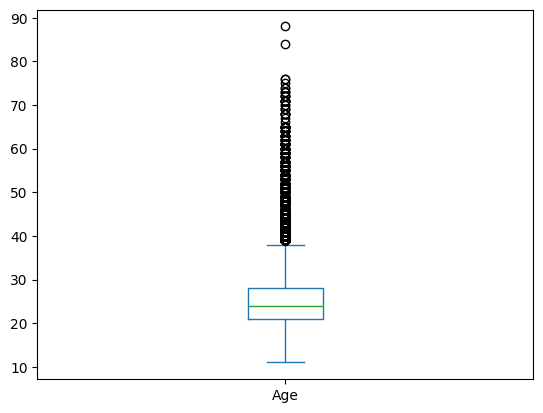

In [112]:
df['Age'].plot(kind = "box") 
plt.show()

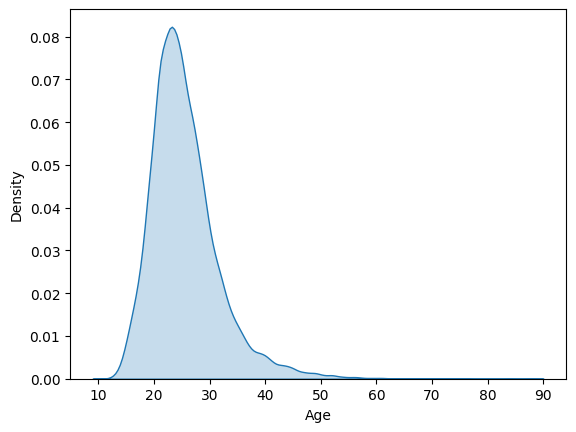

In [113]:
sns.kdeplot(data=df, x= 'Age', fill=True)
plt.show()

In [114]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [115]:
norm_upper = df["Age"].mean() + 3 * df["Age"].std()
norm_lower = df["Age"].mean() - 3 * df["Age"].std()

In [116]:
df = df[(df["Age"] > norm_lower) & (df["Age"] < norm_upper)]

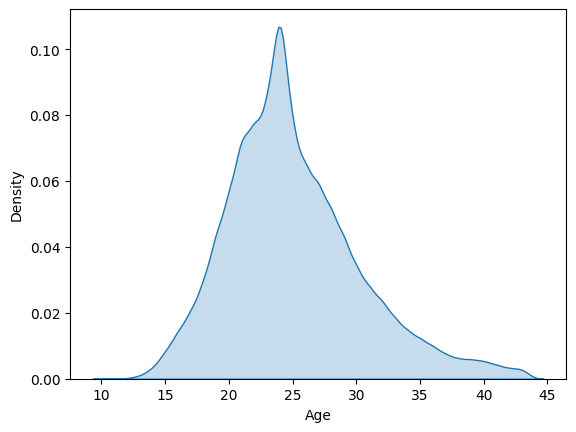

In [117]:
sns.kdeplot(df['Age'], fill=True)
plt.show()

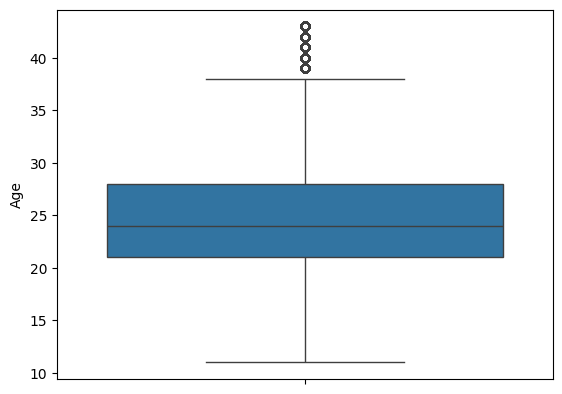

In [118]:
sns.boxplot(df['Age'])
plt.show()

# Step 2 – Handle and clean the 'Height' feature: check for missing values, visualize distribution, and handel outlires

In [119]:
df['Height'].describe()

count    53192.000000
mean       175.516769
std         10.406721
min        127.000000
25%        168.000000
50%        175.000000
75%        183.000000
max        223.000000
Name: Height, dtype: float64

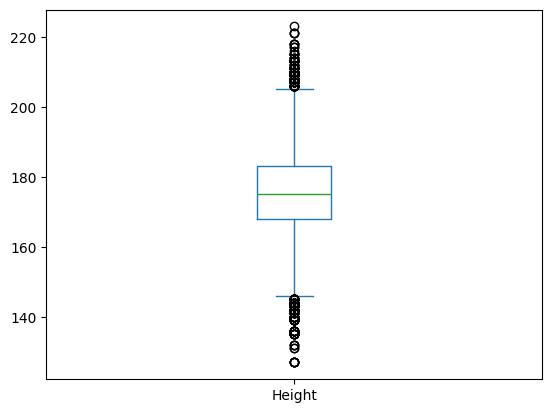

In [120]:
df['Height'].plot(kind = "box") 
plt.show()

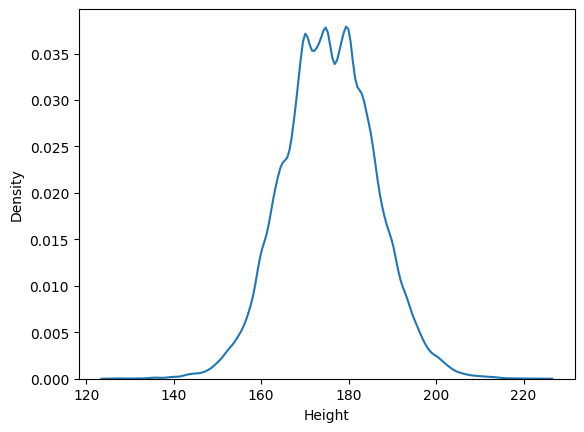

In [121]:
sns.kdeplot(df['Height'])
plt.show()

In [122]:
df['Height'].fillna(df['Height'].median(), inplace=True)

In [123]:
norm_upper = df["Height"].mean() + 3 * df["Age"].std()
norm_lower = df["Height"].mean() - 3 * df["Height"].std()

In [124]:
df = df[(df["Height"] > norm_lower) & (df["Height"] < norm_upper)]

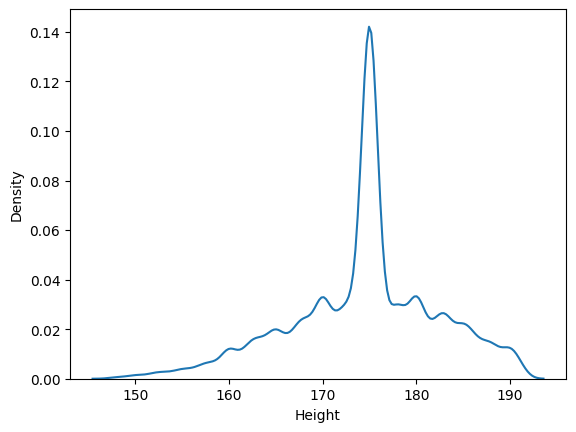

In [125]:
sns.kdeplot(df['Height'])
plt.show()

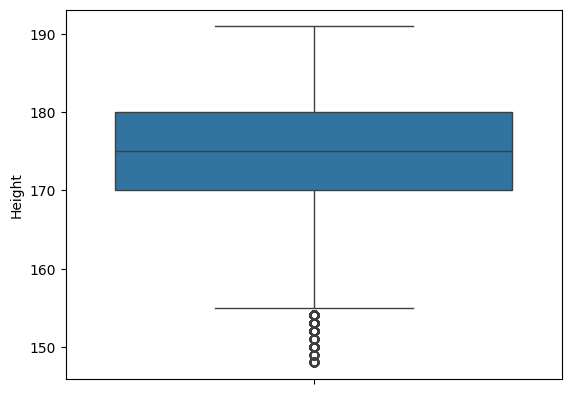

In [126]:
sns.boxplot(df['Height'])
plt.show()

# Step 3 – Handle and clean the 'Weight' feature: check for missing values, visualize distribution, and handel outlires

In [127]:
df['Weight'].describe()

count    48997.000000
mean        69.504235
std         12.900902
min         30.000000
25%         60.000000
50%         69.000000
75%         77.000000
max        214.000000
Name: Weight, dtype: float64

<Axes: >

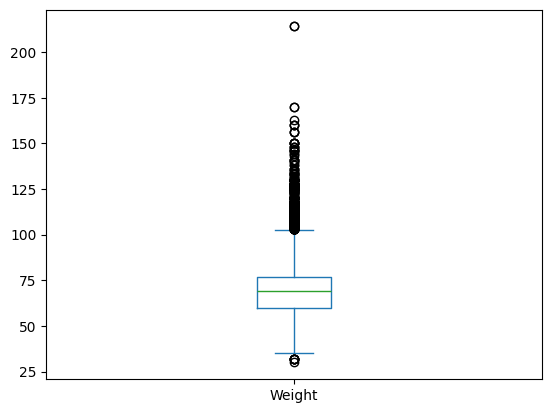

In [128]:
df['Weight'].plot(kind = "box")

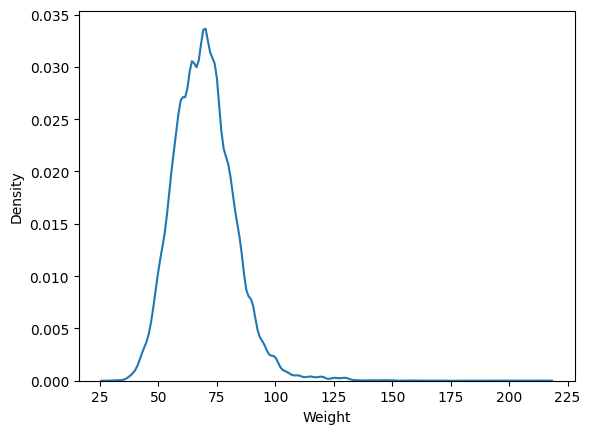

In [129]:
sns.kdeplot(df['Weight'])
plt.show()

In [130]:
df['Weight'].fillna(df['Weight'].median(), inplace=True)

In [131]:
norm_upper = df["Weight"].mean() + 3 * df["Weight"].std()
norm_lower = df["Weight"].mean() - 3 * df["Weight"].std()
df = df[(df["Weight"] > norm_lower) & (df["Weight"] < norm_upper)]

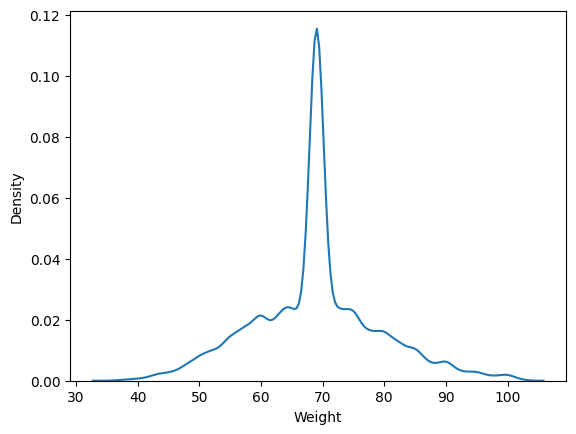

In [132]:
sns.kdeplot(df['Weight'])
plt.show()

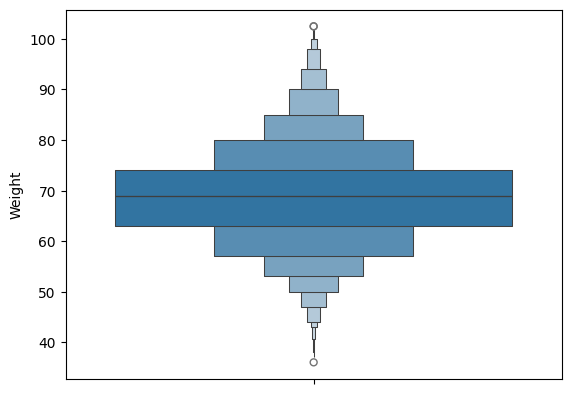

In [135]:
sns.boxenplot(df['Weight'])
plt.show()

# Handel Medal Feature

In [138]:
df['Medal'].fillna('No Medal', inplace=True)

In [139]:
df.isna().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

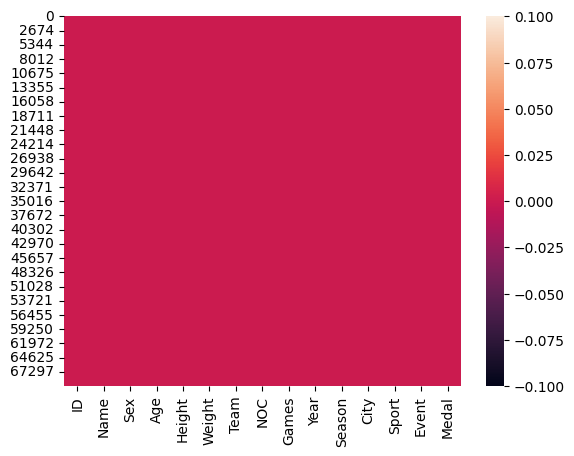

In [140]:
sns.heatmap(df.isna())
plt.show()

# EDA

# 🏋️‍♂️ Athlete Demographics

# 1- What is the age distribution of athletes?

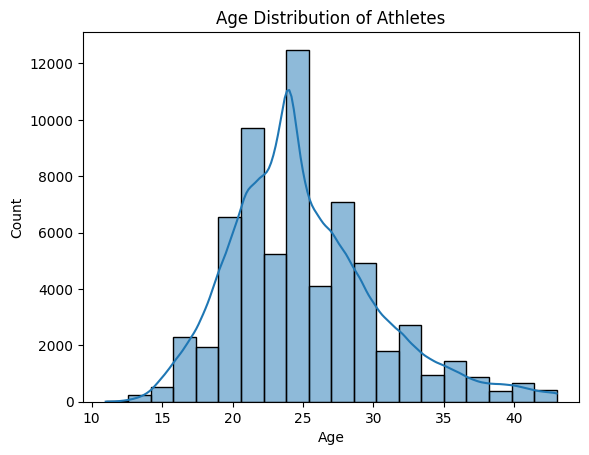

In [145]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Athletes')
plt.show()


# 2- Are there age differences across sports or genders?

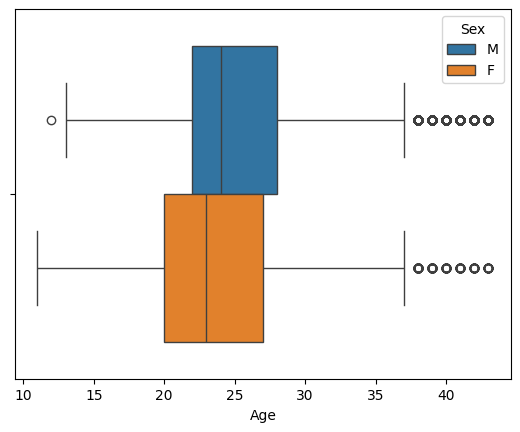

In [153]:
sns.boxplot(df, x= 'Age', hue='Sex')
plt.show()

# 3- What is the distribution of athlete heights and weights? 

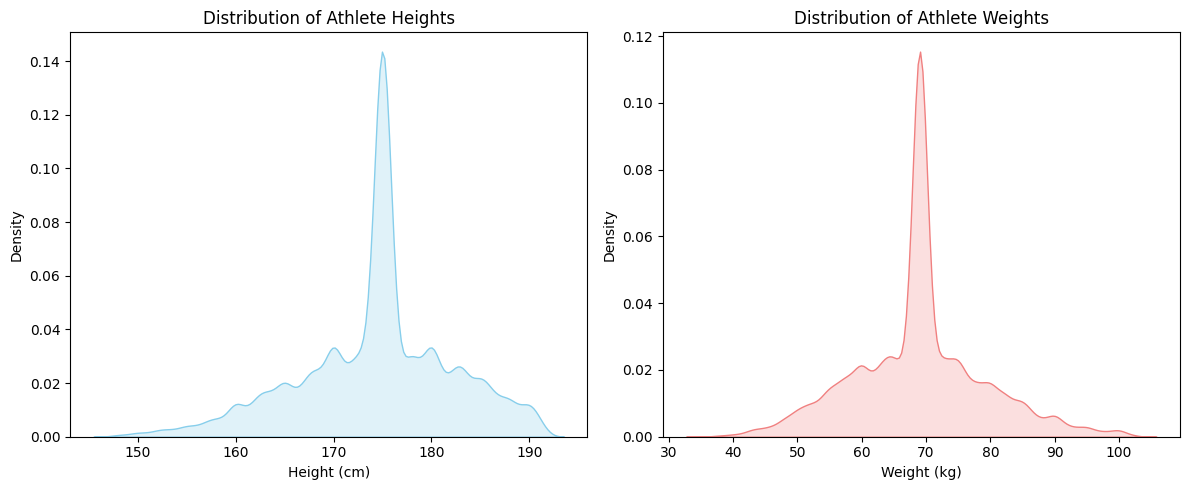

In [157]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='Height', fill=True, color='skyblue')
plt.title('Distribution of Athlete Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='Weight', fill=True, color='lightcoral')
plt.title('Distribution of Athlete Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# 🏳️ Country & Team Insights

# 1-Which countries have the highest athlete participation?

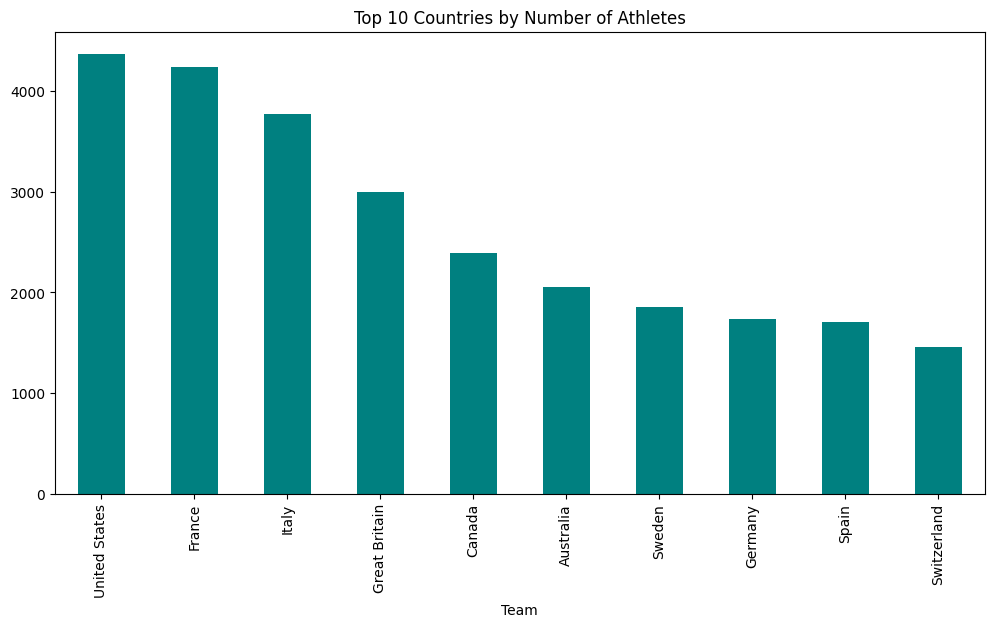

In [164]:
df['Team'].value_counts().head(10).plot(kind='bar', figsize=(12, 6), color='teal')
plt.title('Top 10 Countries by Number of Athletes')
plt.show()

# Do countries differ in the average age  of their athletes?

C:\Users\sad57\AppData\Local\Temp\ipykernel_34496\1070658108.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_stats_sorted_age.head(15), x='Age', y='Team', palette='coolwarm')


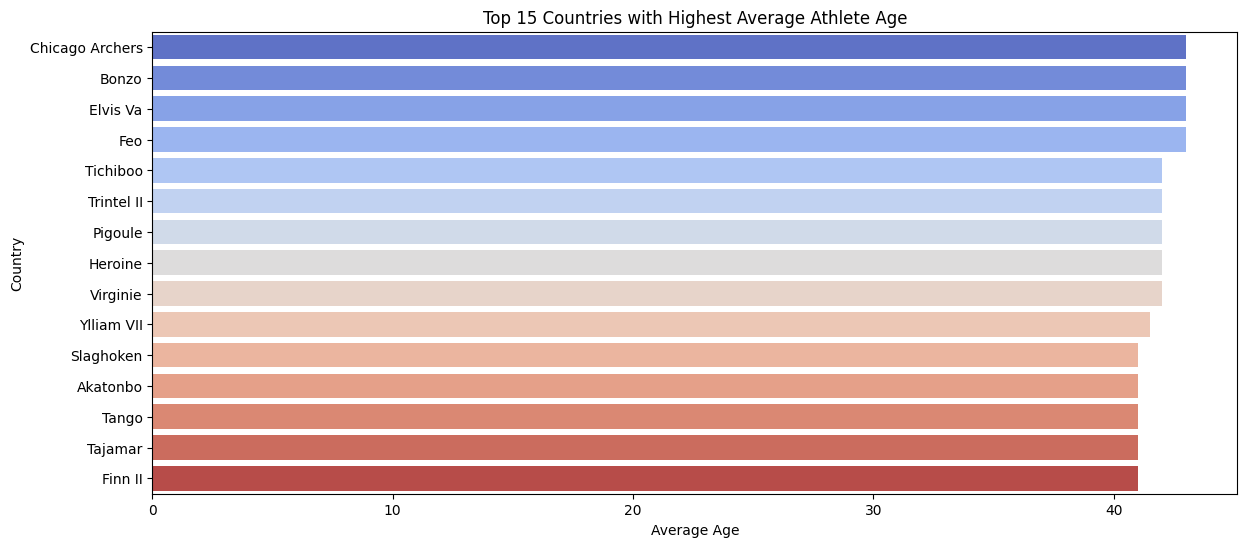

In [174]:
country_stats = df.groupby('Team')[['Age']].mean().reset_index()


country_stats_sorted_age = country_stats.sort_values('Age', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(data=country_stats_sorted_age.head(15), x='Age', y='Team', palette='coolwarm')
plt.title('Top 15 Countries with Highest Average Athlete Age')
plt.xlabel('Average Age')
plt.ylabel('Country')
plt.show()




# 🏅 Sports & Events

# 1- Which sports have the most diverse participation across genders?

In [201]:
sports_10 = df[['Sport', 'Sex']].value_counts().head(10)
sports_10

Sport       Sex
Athletics   M      6991
Gymnastics  M      4037
Athletics   F      3055
Swimming    M      3033
Fencing     M      2470
Swimming    F      2448
Cycling     M      2422
Shooting    M      2207
Gymnastics  F      2018
Football    M      1715
Name: count, dtype: int64

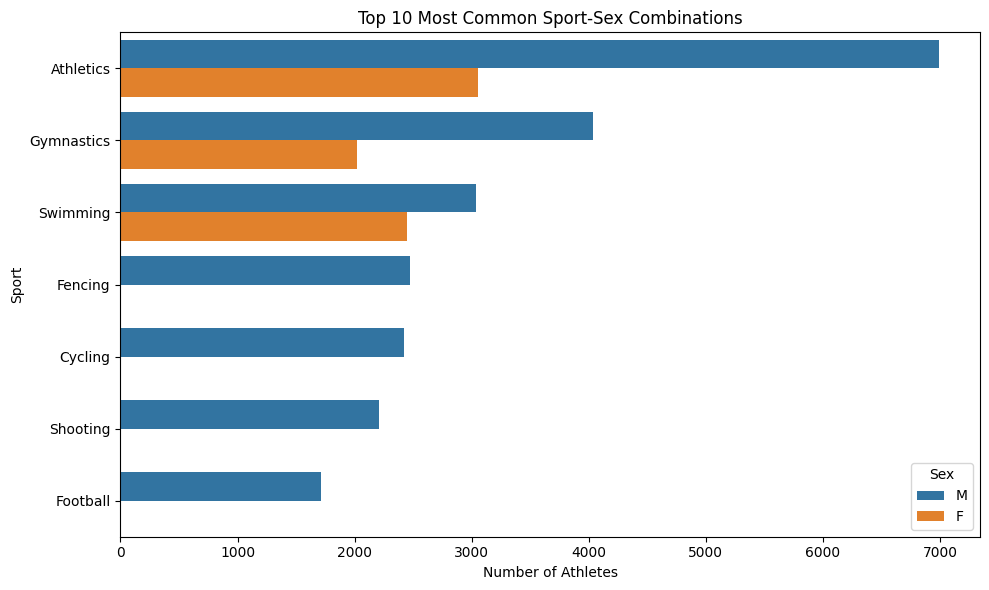

In [203]:
sports_10_df = sports_10.reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(data=sports_10_df, x='Count', y='Sport', hue='Sex')

plt.title('Top 10 Most Common Sport-Sex Combinations')
plt.xlabel('Number of Athletes')
plt.ylabel('Sport')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

# 2- How many unique events exist, and which sports have the highest event count?

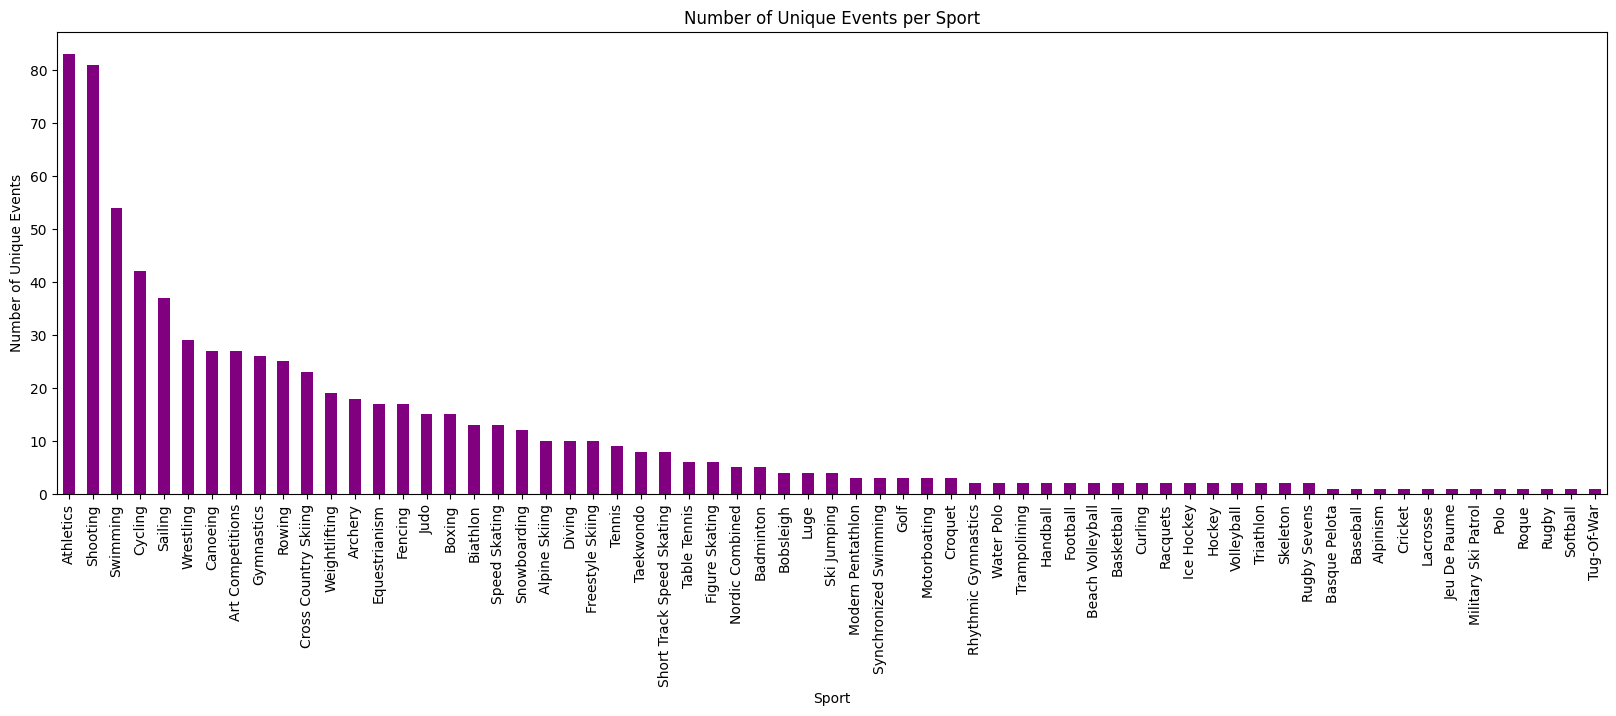

In [212]:
events_per_sport = df.groupby('Sport')['Event'].nunique().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
events_per_sport.plot(kind='bar', figsize=(20, 6), color='purple')
plt.title('Number of Unique Events per Sport')
plt.xlabel('Sport')
plt.ylabel('Number of Unique Events')
plt.show()


# 🎯 Performance Patterns (if Medal data is available)

In [222]:
medals_by_team = df[df['Medal'] != 'No Medal'].groupby('Team')['Medal'].count().sort_values(ascending=False)

C:\Users\sad57\AppData\Local\Temp\ipykernel_34496\2979130632.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=medals_df, x='Medal Count', y='Team', palette='rocket')


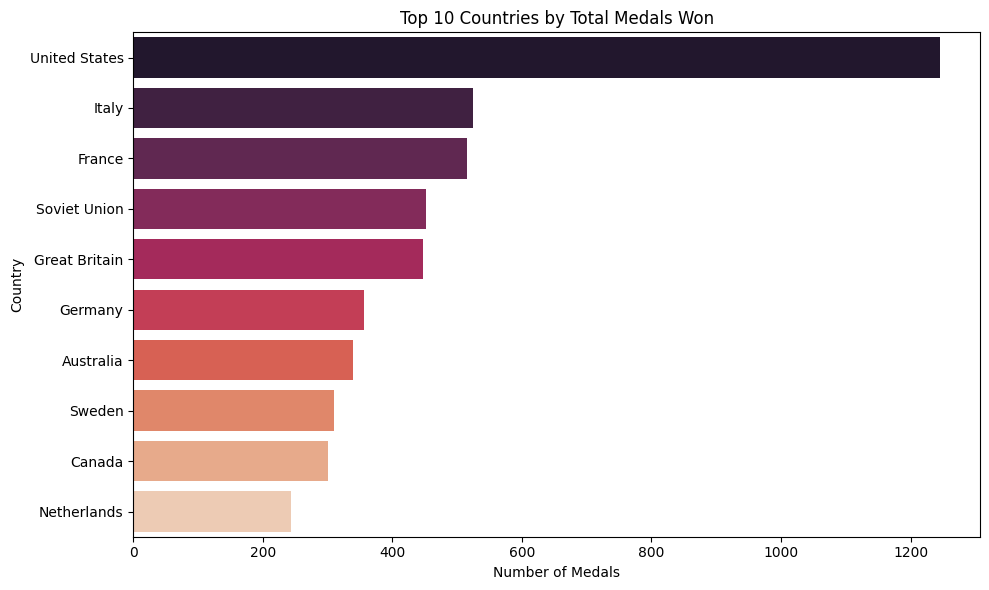

In [223]:
# Plot top 10 medal-winning countries
medals_df = medals_by_team.head(10).reset_index(name='Medal Count')

plt.figure(figsize=(10, 6))
sns.barplot(data=medals_df, x='Medal Count', y='Team', palette='rocket')
plt.title('Top 10 Countries by Total Medals Won')
plt.xlabel('Number of Medals')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# What’s the medal distribution by gender or sport? ➤

C:\Users\sad57\AppData\Local\Temp\ipykernel_34496\1451458126.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medals_by_sex.index, y=medals_by_sex.values, palette='Set2')


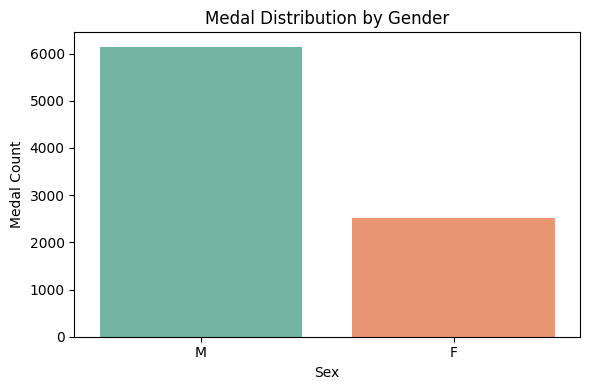

In [226]:

medals_by_sex = df[df['Medal'] != 'No Medal']['Sex'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=medals_by_sex.index, y=medals_by_sex.values, palette='Set2')
plt.title('Medal Distribution by Gender')
plt.xlabel('Sex')
plt.ylabel('Medal Count')
plt.tight_layout()
plt.show()


C:\Users\sad57\AppData\Local\Temp\ipykernel_34496\48966747.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medals_by_sport.values, y=medals_by_sport.index, palette='cubehelix')


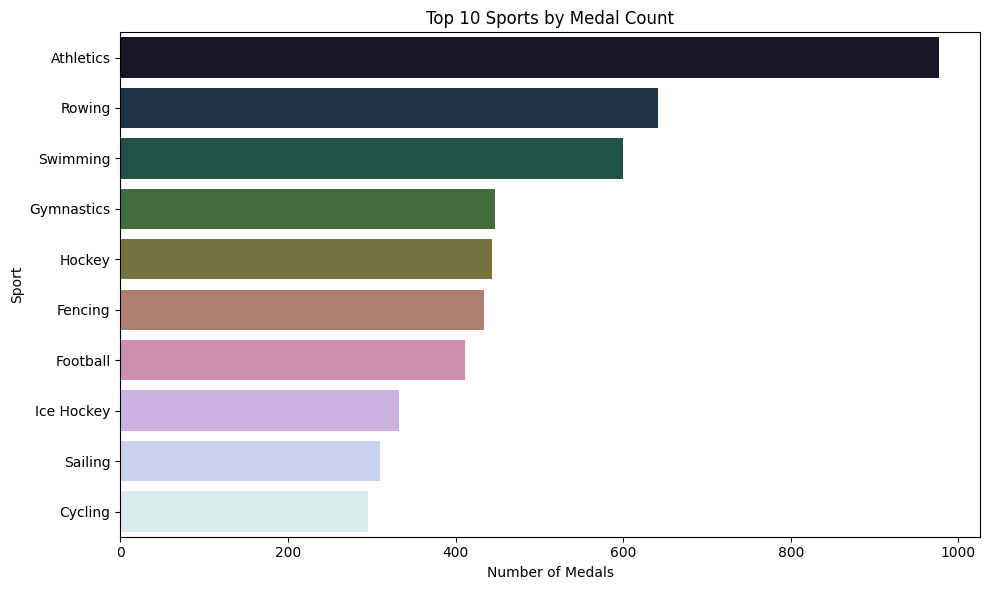

In [228]:
# Group by Sport
medals_by_sport = df[df['Medal'] != 'No Medal']['Sport'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=medals_by_sport.values, y=medals_by_sport.index, palette='cubehelix')
plt.title('Top 10 Sports by Medal Count')
plt.xlabel('Number of Medals')
plt.ylabel('Sport')
plt.tight_layout()
plt.show()
